<a href="https://colab.research.google.com/github/mattdmeans/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Unit_1_BW_codebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go 
import folium
from folium.plugins import HeatMap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('/content/crime.csv', encoding = 'latin')

In [3]:
print(df.shape)
df.head()

(319073, 17)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

In [5]:
df = df.fillna(np.NaN)

In [6]:
df_null_district = df[df['DISTRICT'].isnull()]

In [7]:
df_null_district.shape

(1765, 17)

In [8]:
df = df[df['Lat'].notna()]

In [9]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1481
REPORTING_AREA              0
SHOOTING               298089
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                   1885
Lat                         0
Long                        0
Location                    0
dtype: int64

In [10]:
df = df[df['DISTRICT'].notna()]

In [11]:
df.shape

(297593, 17)

In [12]:
df.head(2)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"


In [13]:
common_crimes = df['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending = False).head(20)

In [14]:
df[df['OFFENSE_CODE_GROUP'] == 'Other'].head(10)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
13,I182070922,2647,Other,THREATS TO DO BODILY HARM,B3,429,NaN,2018-09-03 20:39:00,2018,9,Monday,20,Part Two,WOODROW AVE,42.286470,-71.087147,"(42.28647012, -71.08714661)"
18,I182070917,2647,Other,THREATS TO DO BODILY HARM,B2,901,NaN,2018-09-03 19:52:00,2018,9,Monday,19,Part Two,HORADAN WAY,42.333717,-71.096658,"(42.33371742, -71.09665806)"
29,I182070903,2900,Other,VAL - VIOLATION OF AUTO LAW - OTHER,B3,463,NaN,2018-09-03 18:55:00,2018,9,Monday,18,Part Two,BLUE HILL AVE,42.295904,-71.087733,"(42.29590385, -71.08773294)"
55,I182070873,3625,Other,DANGEROUS OR HAZARDOUS CONDITION,B2,327,NaN,2018-09-03 15:38:00,2018,9,Monday,15,Part Three,WAYLAND ST,42.313689,-71.074271,"(42.31368925, -71.07427080)"
83,I182070840,2647,Other,THREATS TO DO BODILY HARM,A1,63,NaN,2018-09-03 14:46:00,2018,9,Monday,14,Part Two,MARTHA RD,42.365802,-71.065383,"(42.36580175, -71.06538257)"
95,I182070830,2647,Other,THREATS TO DO BODILY HARM,B2,294,NaN,2018-09-03 13:25:00,2018,9,Monday,13,Part Two,AKRON ST,42.325794,-71.085638,"(42.32579408, -71.08563758)"
117,I182070807,2647,Other,THREATS TO DO BODILY HARM,E5,748,NaN,2018-09-03 12:01:00,2018,9,Monday,12,Part Two,KEANE RD,42.294762,-71.162393,"(42.29476186, -71.16239270)"
125,I182070800,2900,Other,VAL - VIOLATION OF AUTO LAW - OTHER,B2,325,NaN,2018-09-03 11:14:00,2018,9,Monday,11,Part Two,BEAUFORD LN,42.316205,-71.076092,"(42.31620533, -71.07609249)"
134,I182070791,2900,Other,VAL - VIOLATION OF AUTO LAW - OTHER,B2,325,NaN,2018-09-03 11:14:00,2018,9,Monday,11,Part Two,BEAUFORD LN,42.316205,-71.076092,"(42.31620533, -71.07609249)"
148,I182070779,2610,Other,TRESPASSING,B2,600,NaN,2018-09-03 10:00:00,2018,9,Monday,10,Part Two,HUNTINGTON AVE,42.337501,-71.095831,"(42.33750090, -71.09583094)"


In [15]:
districts = df['DISTRICT'].unique()

In [16]:
for item in districts:
  print(item, '\n' , df[df['DISTRICT'] == item]['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending = False).head(3), '\n')

D14 
 Motor Vehicle Accident Response    2426
Larceny                            1600
Medical Assistance                 1578
Name: OFFENSE_CODE_GROUP, dtype: int64 

C11 
 Motor Vehicle Accident Response    4807
Medical Assistance                 3193
Investigate Person                 2618
Name: OFFENSE_CODE_GROUP, dtype: int64 

D4 
 Larceny                            7148
Motor Vehicle Accident Response    2809
Medical Assistance                 2200
Name: OFFENSE_CODE_GROUP, dtype: int64 

B3 
 Motor Vehicle Accident Response    3260
Verbal Disputes                    2941
Investigate Person                 2412
Name: OFFENSE_CODE_GROUP, dtype: int64 

B2 
 Motor Vehicle Accident Response    5047
Medical Assistance                 3218
Other                              3127
Name: OFFENSE_CODE_GROUP, dtype: int64 

C6 
 Motor Vehicle Accident Response    2321
Medical Assistance                 1799
Larceny                            1735
Name: OFFENSE_CODE_GROUP, dtype: int64 

A1

In [17]:
df.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [18]:
df.head(1)

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"


In [19]:
common_crimes

Motor Vehicle Accident Response    30642
Larceny                            25093
Medical Assistance                 22434
Investigate Person                 18000
Other                              17070
Simple Assault                     14908
Vandalism                          14861
Drug Violation                     14504
Verbal Disputes                    12952
Towed                              10746
Investigate Property               10606
Larceny From Motor Vehicle         10254
Property Lost                       9331
Warrant Arrests                     7585
Aggravated Assault                  7256
Fraud                               5687
Residential Burglary                5579
Violations                          5034
Missing Person Located              4871
Auto Theft                          4521
Name: OFFENSE_CODE_GROUP, dtype: int64

In [20]:
df[df['OFFENSE_CODE_GROUP'] == 'Larceny']['OFFENSE_DESCRIPTION'].unique()

array(['LARCENY ALL OTHERS', 'LARCENY SHOPLIFTING',
       'LARCENY THEFT FROM BUILDING', 'LARCENY THEFT OF BICYCLE',
       'LARCENY PURSE SNATCH - NO FORCE ', 'LARCENY PICK-POCKET',
       'LARCENY THEFT FROM COIN-OP MACHINE',
       'LARCENY BICYCLE $200 & OVER', 'LARCENY SHOPLIFTING UNDER $50',
       'LARCENY IN A BUILDING $200 & OVER', 'LARCENY OTHER $200 & OVER',
       'LARCENY SHOPLIFTING $200 & OVER',
       'LARCENY IN A BUILDING $50 TO $199', 'LARCENY OTHER $50 TO $199',
       'LARCENY IN A BUILDING UNDER $50', 'LARCENY OTHER UNDER $50',
       'LARCENY SHOPLIFTING $50 TO $199'], dtype=object)

In [21]:
crimes_by_hr = df['HOUR'].value_counts().sort_index()

In [22]:
clist = df['OFFENSE_CODE_GROUP'].value_counts().sort_values(ascending = False)

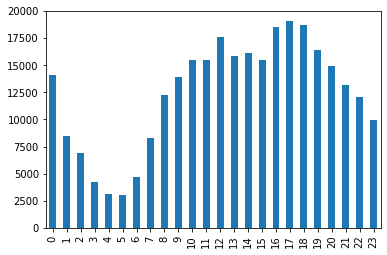

In [23]:
crimes_by_hr.plot.bar()

In [24]:
clist[0:30]

Motor Vehicle Accident Response    30642
Larceny                            25093
Medical Assistance                 22434
Investigate Person                 18000
Other                              17070
Simple Assault                     14908
Vandalism                          14861
Drug Violation                     14504
Verbal Disputes                    12952
Towed                              10746
Investigate Property               10606
Larceny From Motor Vehicle         10254
Property Lost                       9331
Warrant Arrests                     7585
Aggravated Assault                  7256
Fraud                               5687
Residential Burglary                5579
Violations                          5034
Missing Person Located              4871
Auto Theft                          4521
Robbery                             4214
Harassment                          3953
Missing Person Reported             3738
Property Found                      3653
Confidence Games

In [25]:
cc_list = ['Motor Vehicle Accident Response', 'Larceny'
'Medical Assistance', 'Investigate Person', 'Other', 
'Simple Assault', 'Vandalism', 'Drug Violation', 'Verbal Disputes', 'Towed',
'Investigate Property', 'Larceny From Motor Vehicle', 'Property Lost',
'Warrant Arrests', 'Aggravated Assault', 'Fraud', 'Residential Burglary',
'Violations', 'Robbery', 'Auto Theft']

In [26]:
df_cc = df[df['OFFENSE_CODE_GROUP'].isin(cc_list)]

In [27]:
df_cc.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"


In [28]:
clean_cc = df_cc.drop(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'UCR_PART', 'STREET', 'Lat', 'Long', 'Location'], axis = 1)

In [29]:
print(clean_cc.shape)
clean_cc.head()

(203750, 4)


,OFFENSE_CODE_GROUP,DISTRICT,SHOOTING,HOUR
1,Vandalism,C11,NaN,0
2,Towed,D4,NaN,19
3,Investigate Property,D4,NaN,21
4,Investigate Property,B3,NaN,21
5,Motor Vehicle Accident Response,C11,NaN,21


In [30]:
dfccpv = df_cc.pivot_table(index = ['HOUR'], columns = 'OFFENSE_CODE_GROUP', aggfunc = 'size')

In [31]:
dfccpv

OFFENSE_CODE_GROUP,Aggravated Assault,Auto Theft,Drug Violation,Fraud,Investigate Person,Investigate Property,Larceny From Motor Vehicle,Motor Vehicle Accident Response,Other,Property Lost,Residential Burglary,Robbery,Simple Assault,Towed,Vandalism,Verbal Disputes,Violations,Warrant Arrests
HOUR,,,,,,,,,,,,,,,,,,
0,429,240,439,586,729,541,495,980,675,590,226,244,800,434,779,520,217,253
1,381,122,230,39,419,358,259,722,491,198,133,210,729,192,514,338,256,236
2,354,93,158,28,369,319,197,782,377,155,103,214,645,147,458,251,218,151
3,168,78,82,13,245,255,147,489,211,64,102,118,271,118,255,195,63,88
4,117,63,99,13,188,186,113,305,145,24,84,81,189,84,209,127,34,70
5,68,48,40,17,166,155,148,395,134,35,83,74,127,162,217,112,21,75
6,85,88,148,26,201,206,207,703,198,101,129,55,166,289,308,185,35,118
7,129,112,181,75,378,353,348,1162,361,188,232,75,299,1189,484,316,57,170
8,202,156,284,232,568,333,489,1505,722,307,334,81,389,1400,603,432,275,404


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7fdf14aa41d0> has a label of '_' which cannot be automatically added to the legend.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7fdf14aa4828> has a label of '_' which cannot be automatically added to the legend.



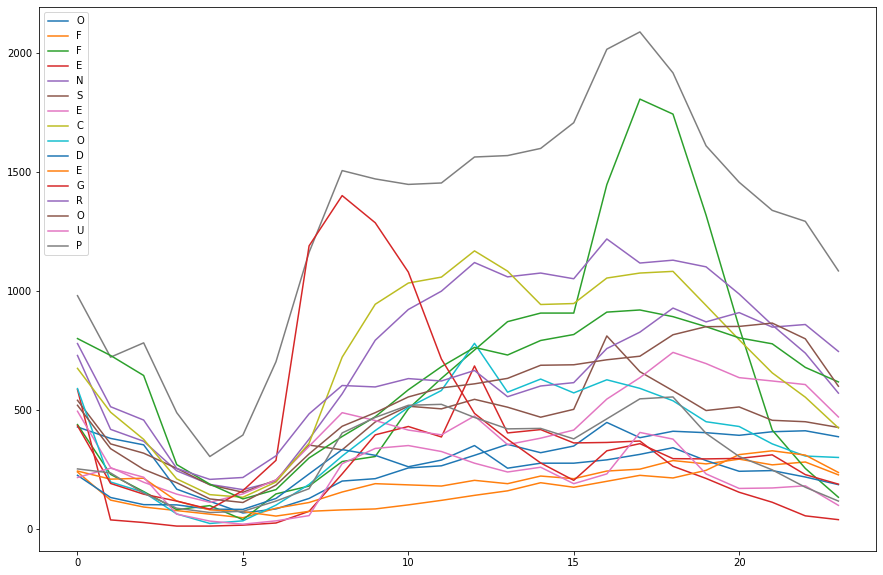

In [32]:
fig, ax = plt.subplots(figsize = (15, 10))

ax.plot(dfccpv)
ax.legend('OFFENSE_CODE_GROUP')

In [33]:
dfccpv.columns

Index(['Aggravated Assault', 'Auto Theft', 'Drug Violation', 'Fraud',
       'Investigate Person', 'Investigate Property',
       'Larceny From Motor Vehicle', 'Motor Vehicle Accident Response',
       'Other', 'Property Lost', 'Residential Burglary', 'Robbery',
       'Simple Assault', 'Towed', 'Vandalism', 'Verbal Disputes', 'Violations',
       'Warrant Arrests'],
      dtype='object', name='OFFENSE_CODE_GROUP')

In [34]:
slim = ['Larceny', 'Simple Assault', 'Vandalism', 'Drug Violation', 'Residential Burglary',
'Violations', 'Robbery', 'Auto Theft']

In [35]:
df_new = df[df['OFFENSE_CODE_GROUP'].isin(slim)]

In [36]:
df_new_pv = df_new.pivot_table(index = ['HOUR'], columns = 'OFFENSE_CODE_GROUP', aggfunc = 'size')

In [37]:
df_new_pv

OFFENSE_CODE_GROUP,Auto Theft,Drug Violation,Larceny,Residential Burglary,Robbery,Simple Assault,Vandalism,Violations
HOUR,,,,,,,,
0,240,439,957,226,244,800,779,217
1,122,230,379,133,210,729,514,256
2,93,158,282,103,214,645,458,218
3,78,82,173,102,118,271,255,63
4,63,99,139,84,81,189,209,34
5,48,40,139,83,74,127,217,21
6,88,148,217,129,55,166,308,35
7,112,181,481,232,75,299,484,57
8,156,284,877,334,81,389,603,275


In [38]:
df_new_pv.T

HOUR,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
OFFENSE_CODE_GROUP,,,,,,,,,,,,,,,,,,,,,,,,
Auto Theft,240,122,93,78,63,48,88,112,156,191,186,181,205,191,223,212,244,252,288,274,294,270,282,228
Drug Violation,439,230,158,82,99,40,148,181,284,305,505,633,752,871,907,907,1446,1805,1742,1318,847,416,255,134
Larceny,957,379,282,173,139,139,217,481,877,1005,1403,1474,1942,1712,1868,1756,1897,1874,1758,1480,1249,889,620,522
Residential Burglary,226,133,103,102,84,83,129,232,334,310,262,290,351,256,277,277,291,314,342,288,243,246,219,187
Robbery,244,210,214,118,81,74,55,75,81,85,102,121,142,161,195,176,201,226,215,247,313,329,311,238
Simple Assault,800,729,645,271,189,127,166,299,389,472,585,682,763,731,792,817,911,920,892,850,803,778,679,618
Vandalism,779,514,458,255,209,217,308,484,603,597,632,622,666,556,601,615,758,827,928,870,909,848,859,746
Violations,217,256,218,63,34,21,35,57,275,339,351,326,277,240,260,191,232,406,378,232,171,173,182,100


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x7fdf1318d8d0> has a label of '_' which cannot be automatically added to the legend.



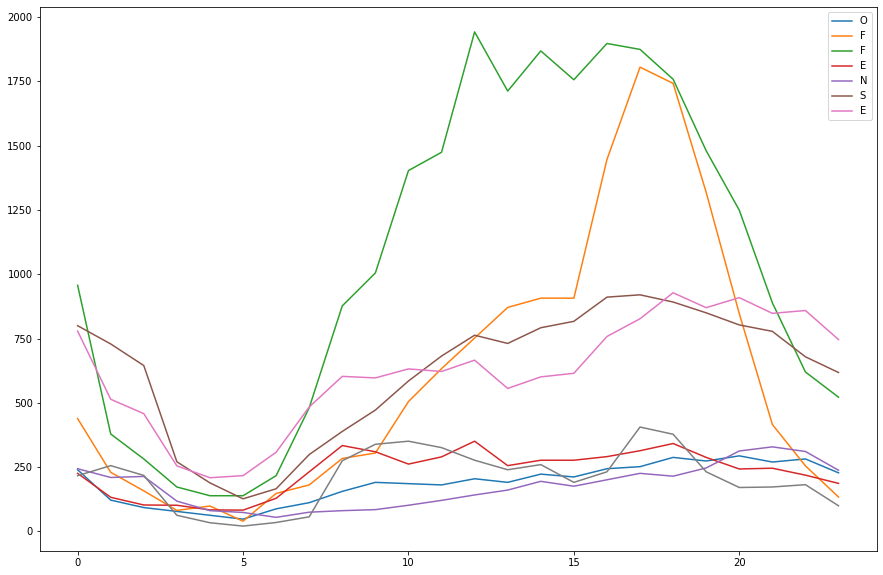

In [39]:
fig, ax = plt.subplots(figsize = (15, 10))

ax.plot(df_new_pv)
ax.legend('OFFENSE_CODE_GROUP')

In [40]:
import plotly.express as px
import math 

In [41]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [42]:
df_new_pv = df_new_pv.T.reset_index()

In [43]:
df_new_pv

HOUR,OFFENSE_CODE_GROUP,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,Auto Theft,240,122,93,78,63,48,88,112,156,191,186,181,205,191,223,212,244,252,288,274,294,270,282,228
1,Drug Violation,439,230,158,82,99,40,148,181,284,305,505,633,752,871,907,907,1446,1805,1742,1318,847,416,255,134
2,Larceny,957,379,282,173,139,139,217,481,877,1005,1403,1474,1942,1712,1868,1756,1897,1874,1758,1480,1249,889,620,522
3,Residential Burglary,226,133,103,102,84,83,129,232,334,310,262,290,351,256,277,277,291,314,342,288,243,246,219,187
4,Robbery,244,210,214,118,81,74,55,75,81,85,102,121,142,161,195,176,201,226,215,247,313,329,311,238
5,Simple Assault,800,729,645,271,189,127,166,299,389,472,585,682,763,731,792,817,911,920,892,850,803,778,679,618
6,Vandalism,779,514,458,255,209,217,308,484,603,597,632,622,666,556,601,615,758,827,928,870,909,848,859,746
7,Violations,217,256,218,63,34,21,35,57,275,339,351,326,277,240,260,191,232,406,378,232,171,173,182,100


In [44]:
df_new_pv.columns

Index(['OFFENSE_CODE_GROUP',                    0,                    1,
                          2,                    3,                    4,
                          5,                    6,                    7,
                          8,                    9,                   10,
                         11,                   12,                   13,
                         14,                   15,                   16,
                         17,                   18,                   19,
                         20,                   21,                   22,
                         23],
      dtype='object', name='HOUR')

In [45]:
newpv_cols = ['OFFENSE_CODE_GROUP', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
              '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

In [46]:
df_new_pv.columns = (newpv_cols)

In [47]:
df_new_pv

,OFFENSE_CODE_GROUP,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,Auto Theft,240,122,93,78,63,48,88,112,156,191,186,181,205,191,223,212,244,252,288,274,294,270,282,228
1,Drug Violation,439,230,158,82,99,40,148,181,284,305,505,633,752,871,907,907,1446,1805,1742,1318,847,416,255,134
2,Larceny,957,379,282,173,139,139,217,481,877,1005,1403,1474,1942,1712,1868,1756,1897,1874,1758,1480,1249,889,620,522
3,Residential Burglary,226,133,103,102,84,83,129,232,334,310,262,290,351,256,277,277,291,314,342,288,243,246,219,187
4,Robbery,244,210,214,118,81,74,55,75,81,85,102,121,142,161,195,176,201,226,215,247,313,329,311,238
5,Simple Assault,800,729,645,271,189,127,166,299,389,472,585,682,763,731,792,817,911,920,892,850,803,778,679,618
6,Vandalism,779,514,458,255,209,217,308,484,603,597,632,622,666,556,601,615,758,827,928,870,909,848,859,746
7,Violations,217,256,218,63,34,21,35,57,275,339,351,326,277,240,260,191,232,406,378,232,171,173,182,100


In [48]:
df_new_pv1 = df_new_pv.T

In [49]:
df_new_pv1.T

,OFFENSE_CODE_GROUP,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,Auto Theft,240,122,93,78,63,48,88,112,156,191,186,181,205,191,223,212,244,252,288,274,294,270,282,228
1,Drug Violation,439,230,158,82,99,40,148,181,284,305,505,633,752,871,907,907,1446,1805,1742,1318,847,416,255,134
2,Larceny,957,379,282,173,139,139,217,481,877,1005,1403,1474,1942,1712,1868,1756,1897,1874,1758,1480,1249,889,620,522
3,Residential Burglary,226,133,103,102,84,83,129,232,334,310,262,290,351,256,277,277,291,314,342,288,243,246,219,187
4,Robbery,244,210,214,118,81,74,55,75,81,85,102,121,142,161,195,176,201,226,215,247,313,329,311,238
5,Simple Assault,800,729,645,271,189,127,166,299,389,472,585,682,763,731,792,817,911,920,892,850,803,778,679,618
6,Vandalism,779,514,458,255,209,217,308,484,603,597,632,622,666,556,601,615,758,827,928,870,909,848,859,746
7,Violations,217,256,218,63,34,21,35,57,275,339,351,326,277,240,260,191,232,406,378,232,171,173,182,100


In [50]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(
    x = df_new_pv.index, y = df_new_pv['0'],
    mode = 'markers',
    marker = dict(
        size = df_new_pv['0'],
        sizemode = 'area',
    ))
])

fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 1, 2, 3, 4, 5, 6, 7],
        ticktext = ('Auto Theft', 'Drug Violation', 'Larceny', 'Residential Burglary', 'Robbery', 'Simple Assault',
                    'Vandalism', 'Violations')
    )
)

fig.show()

In [51]:
# output = []
# for index,row in .iterrows():
#   for item,counter in zip(row.to_list()[1:], range(0,24)):
#     new_df_test = ([counter,row['OFFENSE_CORE_GROUP'], item])

In [52]:
dfm = {'hour': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
                0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
                0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
                0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
                0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
                0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,
                0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
       'offense_code_group': ['Auto Theft', 'Auto Theft', 'Auto Theft', 'Auto Theft', 'Auto Theft',
                              'Auto Theft', 'Auto Theft', 'Auto Theft', 'Auto Theft', 'Auto Theft',
                              'Auto Theft', 'Auto Theft', 'Auto Theft', 'Auto Theft', 'Auto Theft',
                              'Auto Theft', 'Auto Theft', 'Auto Theft', 'Auto Theft', 'Auto Theft',
                              'Auto Theft', 'Auto Theft', 'Auto Theft', 'Auto Theft',
                              'Drug Violation', 'Drug Violation', 'Drug Violation', 'Drug Violation', 'Drug Violation',
                              'Drug Violation', 'Drug Violation', 'Drug Violation', 'Drug Violation', 'Drug Violation',
                              'Drug Violation', 'Drug Violation', 'Drug Violation', 'Drug Violation', 'Drug Violation',
                              'Drug Violation', 'Drug Violation', 'Drug Violation', 'Drug Violation', 'Drug Violation',
                              'Drug Violation', 'Drug Violation', 'Drug Violation', 'Drug Violation',
                              'Larceny', 'Larceny', 'Larceny', 'Larceny', 'Larceny', 'Larceny', 'Larceny', 'Larceny',
                              'Larceny', 'Larceny', 'Larceny', 'Larceny', 'Larceny', 'Larceny', 'Larceny', 'Larceny',
                              'Larceny', 'Larceny', 'Larceny', 'Larceny', 'Larceny', 'Larceny', 'Larceny', 'Larceny',
                              'Residential Burglary', 'Residential Burglary', 'Residential Burglary', 'Residential Burglary',
                              'Residential Burglary', 'Residential Burglary', 'Residential Burglary', 'Residential Burglary', 
                              'Residential Burglary', 'Residential Burglary', 'Residential Burglary', 'Residential Burglary', 
                              'Residential Burglary', 'Residential Burglary', 'Residential Burglary', 'Residential Burglary',
                              'Residential Burglary', 'Residential Burglary', 'Residential Burglary', 'Residential Burglary', 
                              'Residential Burglary', 'Residential Burglary', 'Residential Burglary', 'Residential Burglary',
                              'Robbery', 'Robbery', 'Robbery', 'Robbery', 'Robbery', 'Robbery',
                              'Robbery', 'Robbery', 'Robbery', 'Robbery', 'Robbery', 'Robbery',
                              'Robbery', 'Robbery', 'Robbery', 'Robbery', 'Robbery', 'Robbery',
                              'Robbery', 'Robbery', 'Robbery', 'Robbery', 'Robbery', 'Robbery',
                              'Simple Assault', 'Simple Assault', 'Simple Assault', 'Simple Assault', 'Simple Assault', 'Simple Assault',
                              'Simple Assault', 'Simple Assault', 'Simple Assault', 'Simple Assault', 'Simple Assault', 'Simple Assault',
                              'Simple Assault', 'Simple Assault', 'Simple Assault', 'Simple Assault', 'Simple Assault', 'Simple Assault',
                              'Simple Assault', 'Simple Assault', 'Simple Assault', 'Simple Assault', 'Simple Assault', 'Simple Assault',
                              'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism',
                              'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism',
                              'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism', 'Vandalism',],
       'count': [88, 30, 33,	23,	26,	14,	32,	37,	51,	59,	65,	65,	63,	51,	71,	71,	69,	80,	85,	96,	87,	87,	93,	75,
                 99,	87,	41,	28,	42,	14,	40,	40,	82,	102,	173,	206,	250,	314,	284,	291,	397,	463,	465,	366,	265,	138,	67,	46,
                 353,	141,	91,	58,	47,	39,	81,	180,	298,	331,	476,	523,	639,	627,	628,	567,	612,	623,	608,	496,	404,	289,	218,	183,
                 60,	31,	38,	34,	23,	29,	44,	63,	94,	75,	77,	70,	104,	58,	82,	74,	79,	73,	96,	76,	71,	63,	61,	51,
                 78,	59,	70,	40,	25,	24,	23,	27,	23,	24,	30,	30,	58,	41,	58,	51,	51,	70,	67,	75,	85,	102,	96,	70,
                 285,	236,	215,	96,	65,	48,	61,	99,	144,	167,	207,	255,	271,	264,	287,	309,	354,	331,	340,	316,	281,	280,	253,	222,
                 252,	161,	141,	65,	65,	85,	102,	141,	196,	186,	205,	213,	210,	186,	169,	174,	219,	241,	303,	269,	293,	237,	255,	233]}

In [53]:
newdf = pd.DataFrame(data = dfm)

In [54]:
newdf

,hour,offense_code_group,count
0,0,Auto Theft,88
1,1,Auto Theft,30
2,2,Auto Theft,33
3,3,Auto Theft,23
4,4,Auto Theft,26
...,...,...,...
163,19,Vandalism,269
164,20,Vandalism,293
165,21,Vandalism,237
166,22,Vandalism,255


In [55]:

fig = px.scatter(newdf, x="hour", y="count", animation_frame="hour", animation_group= "offense_code_group",
           size="count", color="offense_code_group", hover_name="offense_code_group",
           size_max=55, range_x=[-1,25], range_y=[0,700])

fig["layout"].pop("updatemenus")
fig.show()

In [56]:

fig = px.bar(newdf, x="hour", y="count", animation_frame="hour",
          color="offense_code_group", hover_name="offense_code_group",
          range_x=[-1,25], range_y=[0,2200])

fig["layout"].pop("updatemenus")
fig.show()

In [57]:
from ipywidgets import interact
from plotly import offline

In [58]:
import plotly.io as pio
pio.write_html(fig, file = 'index.html', auto_open = True)

fig = px.bar(newdf, x="offense_code_group", y="count", color = 'offense_code_group',
             animation_frame = 'hour', animation_group= 'offense_code_group', range_y = (0, 700))

fig.update_layout(
    title = 'Offense Group Changes Over 24 Hours',
    yaxis_title = 'Count',
    xaxis_title = '',
    margin = dict(
        t = 100,
        b = 100
    ),
    font = dict(
        family = 'Courier New, monospace',
        size = 14,
        color = '#7f7f7f'
    )
)
fig.update_xaxes(tickangle = 30, tickfont = dict(color = 'black', size = 10))

fig.show()



In [59]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [60]:
seven_fac = ['Auto Theft', 'Drug Violation', 'Larceny', 'Residential Burglary', 'Robbery', 'Simple Assault', 'Vandalism']

In [61]:
df_cc

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
5,I182070936,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,C11,398,NaN,2018-09-03 21:09:00,2018,9,Monday,21,Part Three,TALBOT AVE,42.290196,-71.071590,"(42.29019621, -71.07159012)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319067,I060168073-00,3125,Warrant Arrests,WARRANT ARREST,E13,912,NaN,2018-01-27 14:01:00,2018,1,Saturday,14,Part Three,CENTRE ST,42.322838,-71.100967,"(42.32283759, -71.10096723)"
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [62]:
dfv2 = df[df['OFFENSE_CODE_GROUP'].isin(seven_fac)]

In [63]:
dfv2['OFFENSE_CODE_GROUP'].unique()

array(['Larceny', 'Vandalism', 'Auto Theft', 'Robbery',
       'Residential Burglary', 'Simple Assault', 'Drug Violation'],
      dtype=object)

In [64]:
full_years = [2016, 2017]
dfv2 = dfv2[dfv2['YEAR'].isin(full_years)]

In [65]:
test1 = dfv2.pivot_table(index = ['MONTH'], columns = 'OFFENSE_CODE_GROUP', aggfunc = 'size')

In [66]:
test1

OFFENSE_CODE_GROUP,Auto Theft,Drug Violation,Larceny,Residential Burglary,Robbery,Simple Assault,Vandalism
MONTH,,,,,,,
1,217,763,1276,286,260,737,776
2,178,741,1054,266,164,612,749
3,162,984,1110,279,203,751,737
4,195,738,1186,252,195,804,913
5,259,816,1243,296,223,833,818
6,284,827,1353,314,198,801,825
7,266,695,1321,284,209,731,852
8,280,700,1430,278,194,774,917
9,225,670,1334,291,225,695,734


In [67]:
test2 = dfv2.pivot_table(index = ['MONTH'], columns = 'OFFENSE_CODE_GROUP', aggfunc= 'size')

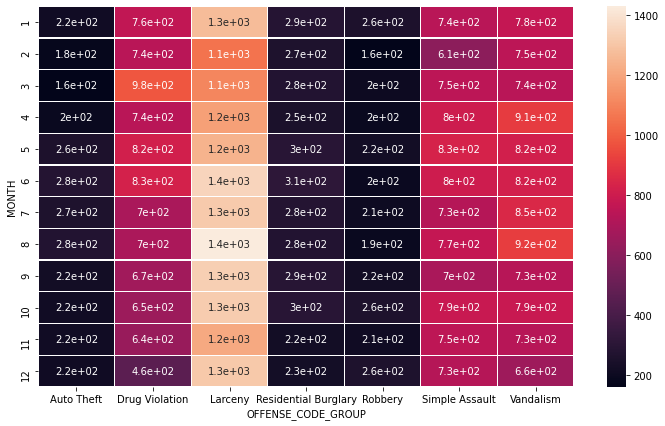

In [68]:
f, ax = plt.subplots(figsize = (12, 7))
sns.heatmap(test1, annot = True, linewidths= .25, ax = ax)

In [69]:
test2

OFFENSE_CODE_GROUP,Auto Theft,Drug Violation,Larceny,Residential Burglary,Robbery,Simple Assault,Vandalism
MONTH,,,,,,,
1,217,763,1276,286,260,737,776
2,178,741,1054,266,164,612,749
3,162,984,1110,279,203,751,737
4,195,738,1186,252,195,804,913
5,259,816,1243,296,223,833,818
6,284,827,1353,314,198,801,825
7,266,695,1321,284,209,731,852
8,280,700,1430,278,194,774,917
9,225,670,1334,291,225,695,734


In [70]:
test1w = dfv2.pivot_table(index = ['DAY_OF_WEEK'], columns = 'OFFENSE_CODE_GROUP', aggfunc = 'size')

In [71]:
test1['sum'] = test1['Auto Theft'] + test1['Drug Violation'] + test1['Larceny'] + test1['Residential Burglary'] + test1['Robbery'] + test1['Simple Assault'] + test1['Vandalism']

In [72]:
test1

OFFENSE_CODE_GROUP,Auto Theft,Drug Violation,Larceny,Residential Burglary,Robbery,Simple Assault,Vandalism,sum
MONTH,,,,,,,,
1,217,763,1276,286,260,737,776,4315
2,178,741,1054,266,164,612,749,3764
3,162,984,1110,279,203,751,737,4226
4,195,738,1186,252,195,804,913,4283
5,259,816,1243,296,223,833,818,4488
6,284,827,1353,314,198,801,825,4602
7,266,695,1321,284,209,731,852,4358
8,280,700,1430,278,194,774,917,4573
9,225,670,1334,291,225,695,734,4174


In [73]:
test1_norm = test1.div(test1.max(axis = 1), axis = 0)

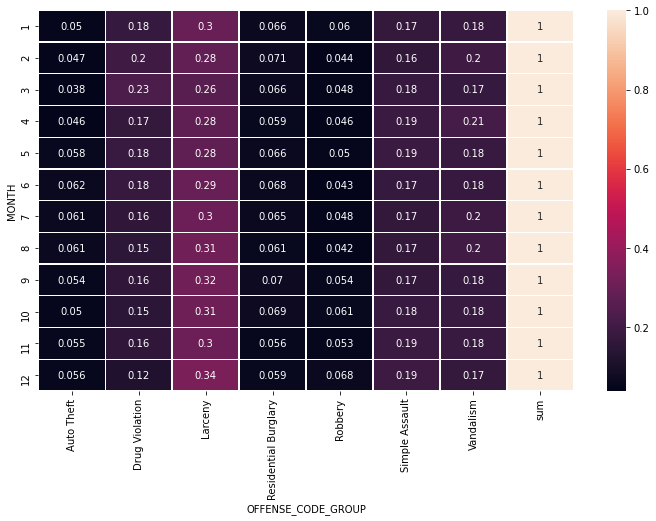

In [74]:
f, ax = plt.subplots(figsize = (12, 7))
sns.heatmap(test1_norm, annot = True, linewidths= .25, ax = ax)

In [75]:
sns.heatmap(np.argsort(np.argsort(test1, axis = 1), axis = 1), annot = True, linewidths= .25, ax = ax)

In [76]:
test3 = np.argsort(np.argsort(test1, axis = 1), axis = 1)

In [77]:
sns.heatmap(test3, annot = True, linewidths= .25, ax = ax)

In [78]:
test_sum = test1.drop(columns= ['Auto Theft', 'Drug Violation', 'Larceny', 'Residential Burglary', 'Robbery', 'Simple Assault', 'Vandalism'])

In [79]:
test_sum

OFFENSE_CODE_GROUP,sum
MONTH,
1,4315
2,3764
3,4226
4,4283
5,4488
6,4602
7,4358
8,4573
9,4174


In [80]:
plt.style.use('fivethirtyeight')

Text(0.5, 0, '')

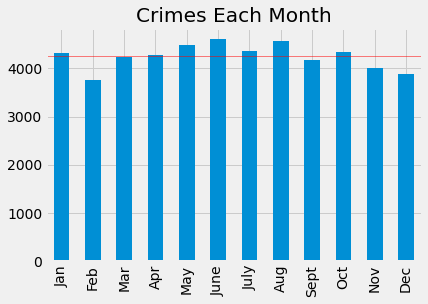

In [81]:
ax = test_sum.plot.bar(y = 'sum')

ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
ax.axhline(y = test_sum['sum'].mean(), linewidth = .5, color = 'red')
ax.get_legend().remove()
ax.set_title('Crimes Each Month')
ax.set_xlabel('')

In [82]:
test2

OFFENSE_CODE_GROUP,Auto Theft,Drug Violation,Larceny,Residential Burglary,Robbery,Simple Assault,Vandalism
MONTH,,,,,,,
1,217,763,1276,286,260,737,776
2,178,741,1054,266,164,612,749
3,162,984,1110,279,203,751,737
4,195,738,1186,252,195,804,913
5,259,816,1243,296,223,833,818
6,284,827,1353,314,198,801,825
7,266,695,1321,284,209,731,852
8,280,700,1430,278,194,774,917
9,225,670,1334,291,225,695,734


In [83]:
test4 = test2

In [84]:
test4['Auto Theft'] = test4['Auto Theft']/ test4['Auto Theft'].sum()

In [85]:
test4['Drug Violation'] = test4['Drug Violation']/ test4['Drug Violation'].sum()
test4['Larceny'] = test4['Larceny']/ test4['Larceny'].sum()
test4['Residential Burglary'] = test4['Residential Burglary']/ test4['Residential Burglary'].sum()
test4['Robbery'] = test4['Robbery']/ test4['Robbery'].sum()
test4['Simple Assault'] = test4['Simple Assault']/ test4['Simple Assault'].sum()
test4['Vandalism'] = test4['Vandalism']/ test4['Vandalism'].sum()


In [86]:
test4

OFFENSE_CODE_GROUP,Auto Theft,Drug Violation,Larceny,Residential Burglary,Robbery,Simple Assault,Vandalism
MONTH,,,,,,,
1,0.079750,0.087752,0.084180,0.086798,0.099655,0.081789,0.081684
2,0.065417,0.085221,0.069534,0.080728,0.062859,0.067917,0.078842
3,0.059537,0.113168,0.073229,0.084674,0.077808,0.083343,0.077579
4,0.071665,0.084876,0.078243,0.076480,0.074741,0.089224,0.096105
5,0.095186,0.093847,0.082003,0.089833,0.085473,0.092443,0.086105
6,0.104373,0.095112,0.089260,0.095296,0.075891,0.088891,0.086842
7,0.097758,0.079931,0.087149,0.086191,0.080107,0.081123,0.089684
8,0.102903,0.080506,0.094340,0.084370,0.074358,0.085895,0.096526
9,0.082690,0.077056,0.088006,0.088316,0.086240,0.077128,0.077263


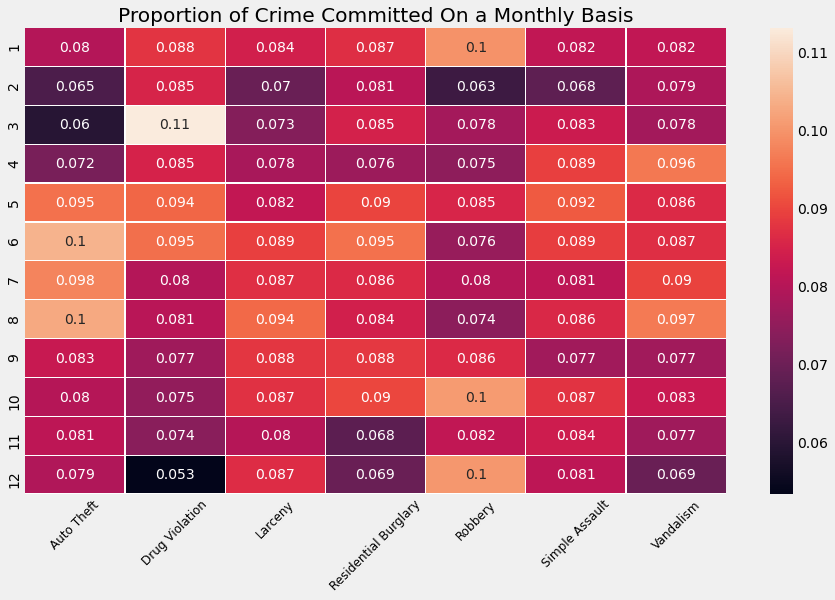

In [87]:
f, ax = plt.subplots(figsize = (14, 8))
sns.heatmap(test4, annot = True, linewidths= .25, ax = ax)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('')
plt.ylabel('')
ax.set_title('Proportion of Crime Committed On a Monthly Basis')
sns.set(rc = {'axes.facecolor': 'white', 'figure.facecolor': 'white'})

First I'll explain why I picked this subject and what my research question is and how I'll answer it.

My above visualization will be my first as it's a larger scope looking at months instead of hours. I might make a basic bar graph of total crimes throughout the week as in inbetween of the other two graphs. 

Initially I'll point out how most crimes I've looked at tend to be more common in the summer and why I think that may be. With the exception of Robberies which I think become more likely because overall foot traffic is down in the winter months.

Next I'll go over the animated plotly graph which shows the change in crimes over a day. I'll explain that different crimes are focused in different areas of the day and why I think that might be.


In [88]:
dfv2

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
5633,I182064766,617,Larceny,LARCENY THEFT FROM BUILDING,E5,729,NaN,2017-10-23 13:58:00,2017,10,Monday,13,Part One,VFW PKWY,42.285370,-71.172440,"(42.28536992, -71.17244016)"
5919,I182064449,706,Auto Theft,AUTO THEFT - MOTORCYCLE / SCOOTER,E18,544,NaN,2017-03-22 09:00:00,2017,3,Wednesday,9,Part One,AUSTIN ST,42.257688,-71.126418,"(42.25768764, -71.12641770)"
6940,I182063310,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,774,NaN,2017-03-23 12:00:00,2017,3,Thursday,12,Part One,COMMONWEALTH AVE,42.338363,-71.154410,"(42.33836272, -71.15441001)"
14227,I182055406,617,Larceny,LARCENY THEFT FROM BUILDING,D4,136,NaN,2017-12-15 16:06:00,2017,12,Friday,16,Part One,MARLBOROUGH ST,42.352569,-71.079788,"(42.35256908, -71.07978844)"
16568,I182052929,619,Larceny,LARCENY ALL OTHERS,A1,63,NaN,2017-08-13 21:00:00,2017,8,Sunday,21,Part One,NEW SUDBURY ST,42.361839,-71.059765,"(42.36183857, -71.05976489)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319024,I120470733-00,724,Auto Theft,AUTO THEFT,C6,205,NaN,2016-09-23 19:15:00,2016,9,Friday,19,Part One,A ST,42.346953,-71.051127,"(42.34695268, -71.05112684)"
319026,I120283195-00,619,Larceny,LARCENY ALL OTHERS,B2,911,NaN,2016-04-27 00:00:00,2016,4,Wednesday,0,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)"
319031,I120201612-00,1841,Drug Violation,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,B2,292,NaN,2017-01-20 02:00:00,2017,1,Friday,2,Part Two,JOHN ELIOT SQ,42.330013,-71.091179,"(42.33001318, -71.09117863)"
319048,I110261417-00,619,Larceny,LARCENY OTHER $200 & OVER,B2,324,NaN,2016-07-29 00:00:00,2016,7,Friday,0,Part One,BOWDOIN ST,42.307038,-71.066153,"(42.30703835, -71.06615319)"


In [89]:
df_w = dfv2.pivot_table(index = ['DAY_OF_WEEK'], columns = 'OFFENSE_CODE_GROUP', aggfunc = 'size')

In [90]:
df_w

OFFENSE_CODE_GROUP,Auto Theft,Drug Violation,Larceny,Residential Burglary,Robbery,Simple Assault,Vandalism
DAY_OF_WEEK,,,,,,,
Friday,410,1492,2305,572,367,1363,1375
Monday,383,1295,2174,498,353,1155,1315
Saturday,366,1078,2133,419,363,1358,1513
Sunday,411,551,1820,358,394,1410,1512
Thursday,388,1480,2217,472,391,1251,1220
Tuesday,368,1352,2287,465,390,1214,1258
Wednesday,395,1447,2222,511,351,1260,1307


In [91]:
df_w['sum'] = df_w['Auto Theft'] + df_w['Drug Violation'] + df_w['Larceny'] + df_w['Residential Burglary'] + df_w['Robbery'] + df_w['Simple Assault'] + df_w['Vandalism']

In [92]:
df_w

OFFENSE_CODE_GROUP,Auto Theft,Drug Violation,Larceny,Residential Burglary,Robbery,Simple Assault,Vandalism,sum
DAY_OF_WEEK,,,,,,,,
Friday,410,1492,2305,572,367,1363,1375,7884
Monday,383,1295,2174,498,353,1155,1315,7173
Saturday,366,1078,2133,419,363,1358,1513,7230
Sunday,411,551,1820,358,394,1410,1512,6456
Thursday,388,1480,2217,472,391,1251,1220,7419
Tuesday,368,1352,2287,465,390,1214,1258,7334
Wednesday,395,1447,2222,511,351,1260,1307,7493


In [93]:
df_w1 = df_w

In [94]:
df_w1['Auto Theft'] = df_w1['Auto Theft']/ df_w1['Auto Theft'].sum()
df_w1['Drug Violation'] = df_w1['Drug Violation']/ df_w1['Drug Violation'].sum()
df_w1['Larceny'] = df_w1['Larceny']/ df_w1['Larceny'].sum()
df_w1['Residential Burglary'] = df_w1['Residential Burglary']/ df_w1['Residential Burglary'].sum()
df_w1['Robbery'] = df_w1['Robbery']/ df_w1['Robbery'].sum()
df_w1['Simple Assault'] = df_w1['Simple Assault']/ df_w1['Simple Assault'].sum()
df_w1['Vandalism'] = df_w1['Vandalism']/ df_w1['Vandalism'].sum()
df_w1['sum'] = df_w1['sum']/ df_w1['sum'].sum()


In [95]:
df_w1

OFFENSE_CODE_GROUP,Auto Theft,Drug Violation,Larceny,Residential Burglary,Robbery,Simple Assault,Vandalism,sum
DAY_OF_WEEK,,,,,,,,
Friday,0.150680,0.171593,0.152065,0.173596,0.140667,0.151260,0.144737,0.154622
Monday,0.140757,0.148936,0.143423,0.151138,0.135301,0.128177,0.138421,0.140677
Saturday,0.134509,0.123979,0.140718,0.127162,0.139134,0.150705,0.159263,0.141795
Sunday,0.151047,0.063370,0.120069,0.108649,0.151016,0.156475,0.159158,0.126616
Thursday,0.142595,0.170213,0.146259,0.143247,0.149866,0.138830,0.128421,0.145502
Tuesday,0.135244,0.155492,0.150877,0.141123,0.149483,0.134724,0.132421,0.143835
Wednesday,0.145167,0.166417,0.146589,0.155083,0.134534,0.139829,0.137579,0.146953


In [96]:
df_w1f = df_w1.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

([<matplotlib.axis.YTick at 0x7fdf1215b5f8>,
 [Text(0, 0.5, 'Mon'),
  Text(0, 1.5, 'Tue'),
  Text(0, 2.5, 'Wed'),
  Text(0, 3.5, 'Thu'),
  Text(0, 4.5, 'Fri'),
  Text(0, 5.5, 'Sat'),
  Text(0, 6.5, 'Sun')])

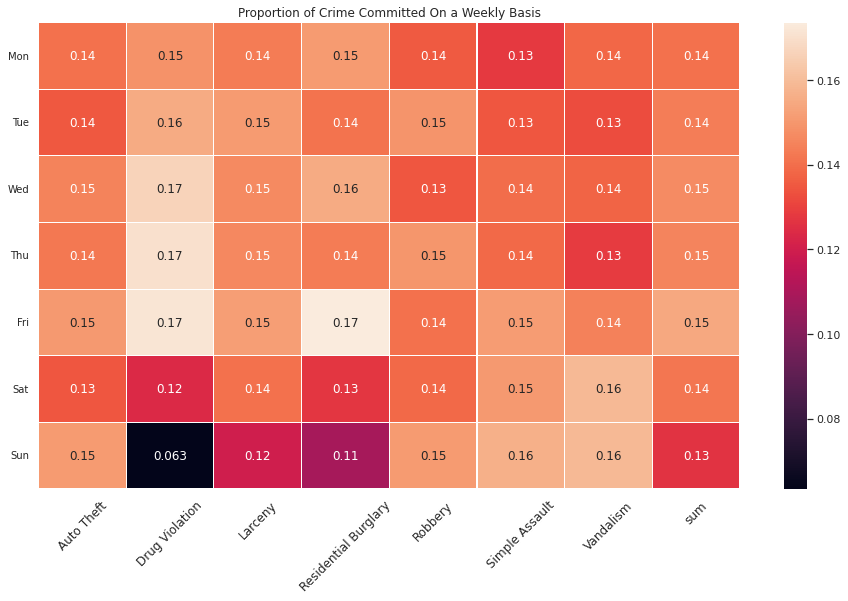

In [97]:
f, ax = plt.subplots(figsize = (14, 8))
sns.heatmap(df_w1f, annot = True, linewidths= .25, ax = ax)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('')
plt.ylabel('')
ax.set_title('Proportion of Crime Committed On a Weekly Basis')
sns.set(rc = {'axes.facecolor': 'white', 'figure.facecolor': 'white'})
plt.yticks(np.arange(7)+ 0.5, ('Mon', 'Tue','Wed','Thu','Fri','Sat','Sun'), rotation=0, fontsize="10", va="center")

In [98]:
df_w2 = df_w.drop(columns = ['Auto Theft', 'Drug Violation', 'Larceny', 'Residential Burglary', 'Robbery', 'Simple Assault', 'Vandalism'])

In [99]:
df_w2

OFFENSE_CODE_GROUP,sum
DAY_OF_WEEK,
Friday,0.154622
Monday,0.140677
Saturday,0.141795
Sunday,0.126616
Thursday,0.145502
Tuesday,0.143835
Wednesday,0.146953


In [100]:
df_w2 = df_w2.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

AttributeError: ignored

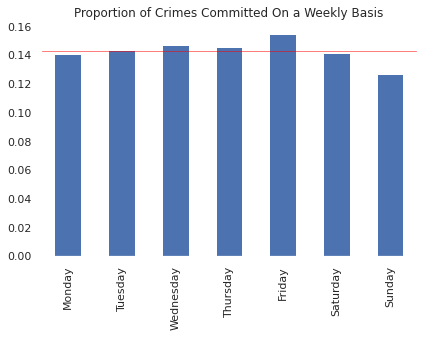

In [101]:
ax = df_w2.plot.bar(y = 'sum')

ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.get_legend().remove()
ax.set_title('Proportion of Crimes Committed On a Weekly Basis')
ax.set_xlabel('')
ax.axhline(y = df_w2['sum'].mean(), linewidth = .5, color = 'red')
ax.set_axis_color('white')